# **Lead Scoring Case Study**

**Problem Statement:**

X Education needs assistance in identifying the most promising leads—those most likely to convert into paying customers. The company requires the development of a model that can assign a lead score to each prospect. This score will indicate the likelihood of conversion, with higher scores suggesting a greater chance of conversion and lower scores indicating a lower probability. The CEO has set a target lead conversion rate of around 80%.

**Goals and Objectives:**

- Build a Logistic Regression Model:

  Develop a logistic regression model to assign a lead score between 0 and 100 to each lead. This score will help the company focus on potential leads more effectively. A higher lead score should indicate a "hot" lead, one that is highly likely to convert, while a lower score should suggest a "cold" lead with minimal conversion potential. Address Future Requirements:


  The model should be adaptable to accommodate additional problems or changing requirements presented by the company in the future. These specific challenges are outlined in a separate document and should be addressed based on the initial logistic regression model. Ensure these adjustments are reflected in the final presentation, where you'll make data-driven recommendations to the company.

## **Step-1: Importing required modules**

In [ ]:
#Import the basic librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import the statsmodel and its corresponding modules
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import the sklearn and its corresponding modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [ ]:
#Setting the display of rows and columns of dataframe
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)

## **Step-2: Reading and understanding data**

In [ ]:
#Reading the CSV File
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#To get the datatypes of columns in the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#To get the statistical information of columns in the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
#Get the shape of the dataframe
leads.shape

(9240, 37)

In [ ]:
#Get the list of columns of dataframe
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
#Checking whether the data has duplicates or not
leads.duplicated().sum()

0

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.
'Select' values are as good as NULL.So we can convert these values to null values.

In [ ]:
#Replace Select with null values
leads = leads.replace('Select',np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## **Step-3: Data Cleaning**

In [ ]:
#Find null values in the data
leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [ ]:
# Finding no. of unique values in each column.
leads.nunique()

,0
Prospect ID,9240
Lead Number,9240
Lead Origin,5
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1731
Page Views Per Visit,114


### **Re-framing the required columns**

Since the columns Last Activity and Lead Source have minute values, we can club them to a single value.

###### **Re-frame the column Last Activity**

In [ ]:
#Checking the value counts for last activity column.
leads['Last Activity'].value_counts()

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93


In [ ]:
#Since all these values are having small counts , we are clubing them to 'Other_Activity' named value.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [ ]:
#Rechecking the value count for last activity column.
leads['Last Activity'].value_counts()

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93


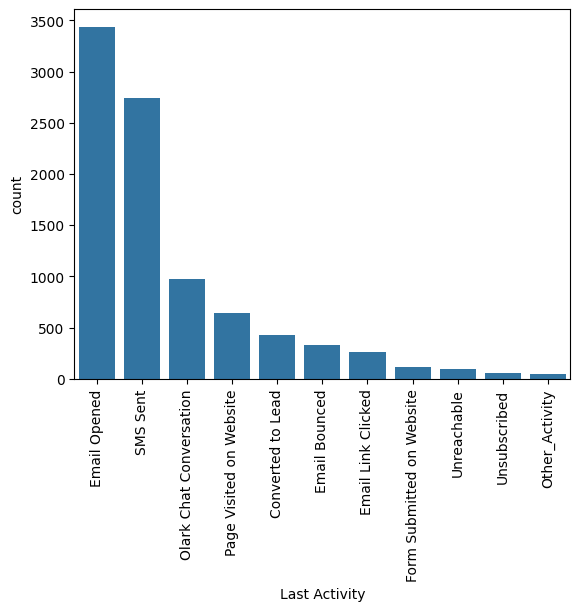

In [ ]:
#Plotting bargraph for the last activity column
sns.barplot(leads['Last Activity'].value_counts())
plt.xticks(rotation=90)
plt.show()

###### **Re-frame the column Lead Source**

In [ ]:
#Getting value counts for the "Lead Source "column.
leads['Lead Source'].value_counts()

,count
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


In [ ]:
#Replace 'Google' with 'google' , since both are same but the first letter is different.
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'].value_counts()

,count
Lead Source,
Google,2873
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


In [ ]:
# Again checking the value counts for lead source column.
leads['Lead Source'].value_counts()

,count
Lead Source,
Google,2873
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


In [ ]:
# since all these values are having small counts , we are clubing them to 'others' named value.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [ ]:
# Again we are getting value count for lead source column.
leads['Lead Source'].value_counts()

,count
Lead Source,
Google,2873
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
Others,23


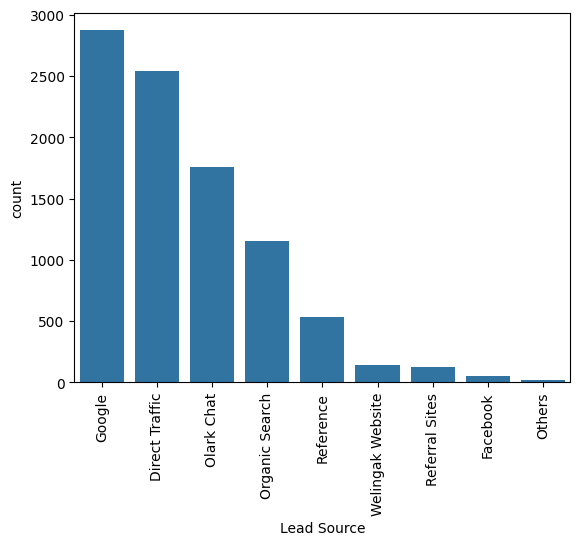

In [ ]:
# ploting bar graph for the lead source column.
sns.barplot(leads['Lead Source'].value_counts())
plt.xticks(rotation=90)
plt.show()

### **Removing highly skewed columns**

In [ ]:
#Dropping the highly skewed columns
print(leads['Magazine'].value_counts())
print(leads['Receive More Updates About Our Courses'].value_counts())
print(leads['I agree to pay the amount through cheque'].value_counts())
print(leads['Get updates on DM Content'].value_counts())
print(leads['Update me on Supply Chain Content'].value_counts())
print(leads['What matters most to you in choosing a course'].value_counts())

Magazine
No    9240
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64
Get updates on DM Content
No    9240
Name: count, dtype: int64
Update me on Supply Chain Content
No    9240
Name: count, dtype: int64
What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


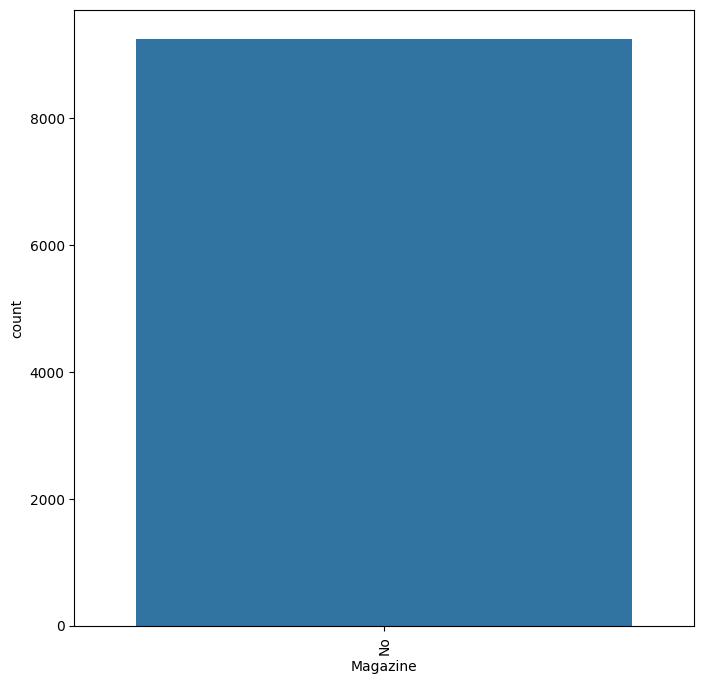

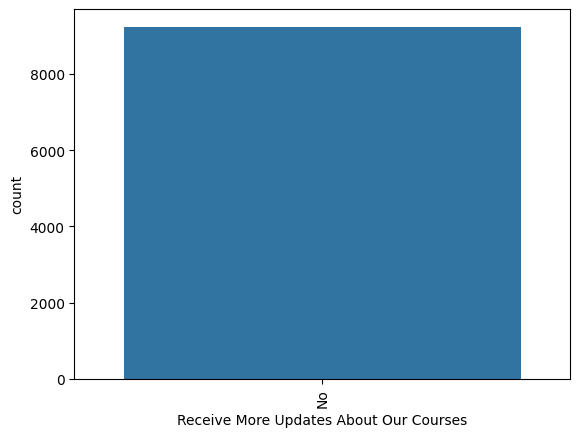

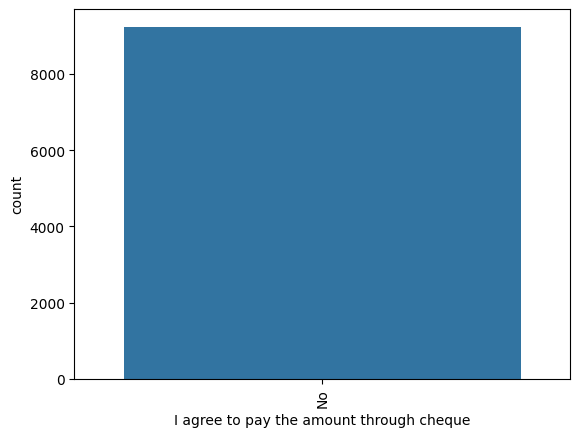

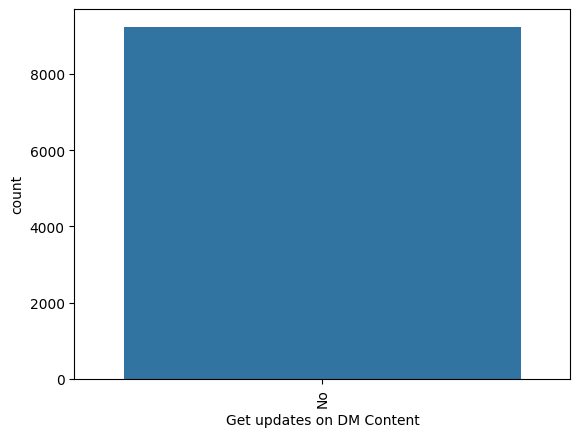

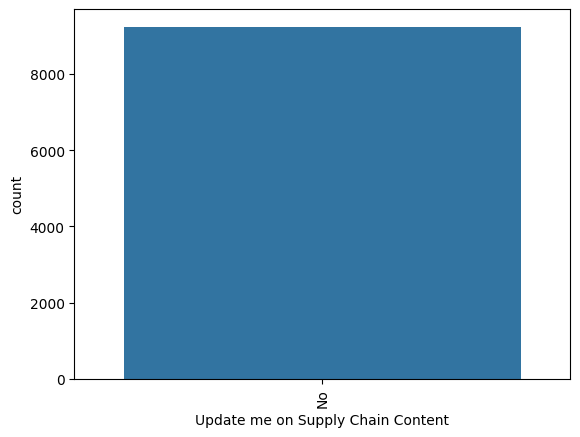

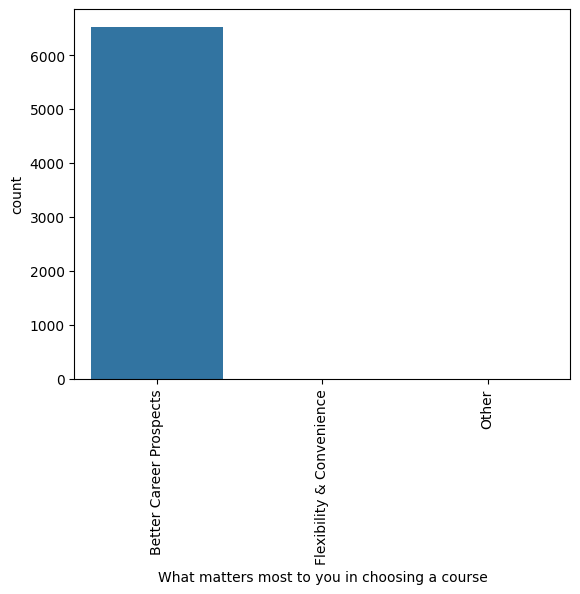

In [ ]:
# plotting the highly skewed coluns using bar graph.
skewed = ['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
          'Get updates on DM Content','Update me on Supply Chain Content','What matters most to you in choosing a course']
plt.figure(figsize=(8,8))
for i in skewed:
  sns.barplot(leads[i].value_counts())
  plt.xticks(rotation=90)
  plt.show()

**We have some highly skewed columns which are not required for the analysis, so we need to drop these columns**

In [ ]:
# Dropping them
leads = leads.drop(['Magazine',
                    'Receive More Updates About Our Courses',
                    'I agree to pay the amount through cheque',
                    'Get updates on DM Content',
                    'Update me on Supply Chain Content',
                    'What matters most to you in choosing a course'],axis=1)
# Checking heads of the dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [ ]:
#Rechecking the shape again
leads.shape

(9240, 31)

### **Removing null value columns**

In [ ]:
#Function to check the percentage of null values in the leads data
def check_null(leads):
  res = (round(leads.isnull().sum()/len(leads),2)*100).sort_values(ascending=False)
  return res

In [ ]:
#Get the list of percentage of null values
pd.DataFrame(check_null(leads))

,0
How did you hear about X Education,78.0
Lead Profile,74.0
Lead Quality,52.0
Asymmetrique Profile Score,46.0
Asymmetrique Activity Score,46.0
Asymmetrique Profile Index,46.0
Asymmetrique Activity Index,46.0
City,40.0
Specialization,37.0
Tags,36.0


In [ ]:
#Since these 7 columns have morethan 40% of null values, we can drop them
leads = leads.drop(['How did you hear about X Education',
                    'Lead Profile',
                    'Lead Quality',
                    'Asymmetrique Profile Score',
                    'Asymmetrique Activity Score',
                    'Asymmetrique Profile Index',
                    'Asymmetrique Activity Index'],axis=1)
# Checking the heads again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [ ]:
#Checking the shape again
leads.shape

(9240, 24)

In [ ]:
# Rechecking the null values again
pd.DataFrame(check_null(leads))

,0
City,40.0
Specialization,37.0
Tags,36.0
What is your current occupation,29.0
Country,27.0
TotalVisits,1.0
Page Views Per Visit,1.0
Last Activity,1.0
Newspaper Article,0.0
A free copy of Mastering The Interview,0.0


**Some of the columns which have null values are to be filled to non-null values.. Imputation**

#### **Imputation of columns**

###### **Impute the values in the City column**

In [ ]:
#Calculate the value counts of the City column
leads['City'].value_counts()

,count
City,
Mumbai,3222
Thane & Outskirts,752
Other Cities,686
Other Cities of Maharashtra,457
Other Metro Cities,380
Tier II Cities,74


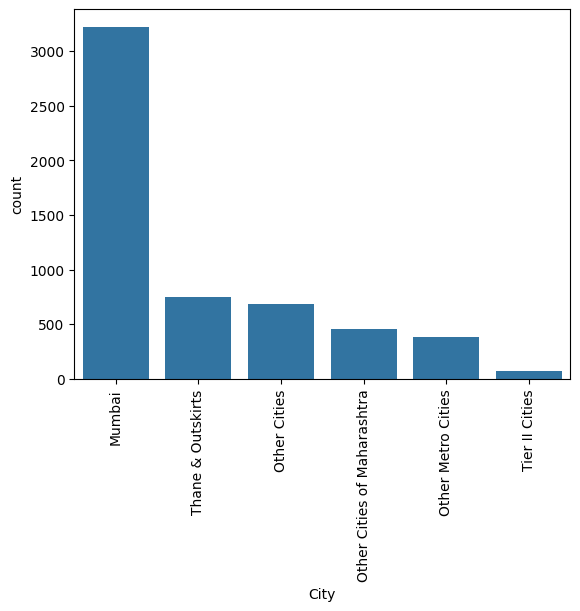

In [ ]:
# Plotting the city column using bar-graph
sns.barplot(leads['City'].value_counts())
plt.xticks(rotation=90)
plt.show()

**From the above graph, we have 'Mumbai' with more value count, so it works as the mode for the city column.**

In [ ]:
#The null values are filled with mode of the City column since it is a categorical column
leads['City'] = leads['City'].fillna(leads['City'].mode()[0])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


###### **Impute the values in the Specialization column**

In [ ]:
#Calculate the value counts of the Specialization column
leads['Specialization'].value_counts()

,count
Specialization,
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338
Travel and Tourism,203


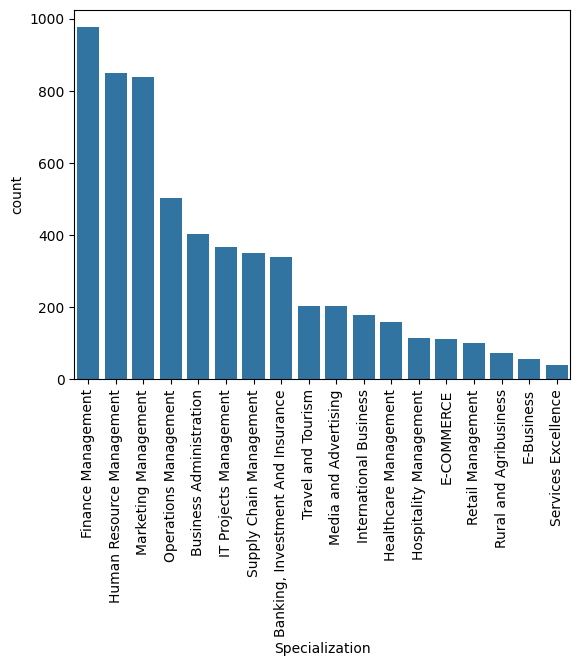

In [ ]:
#Plotting bar graph for the specialization column
sns.barplot(leads['Specialization'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
#The null values are filled with "others" value in the column since it is a categorical column.
leads['Specialization'] = leads['Specialization'].fillna('Others')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


###### **Impute the values in the Tags column**

In [ ]:
#Calculate the value counts of the Tags column
leads['Tags'].value_counts()

,count
Tags,
Will revert after reading the email,2072
Ringing,1203
Interested in other courses,513
Already a student,465
Closed by Horizzon,358
switched off,240
Busy,186
Lost to EINS,175
Not doing further education,145


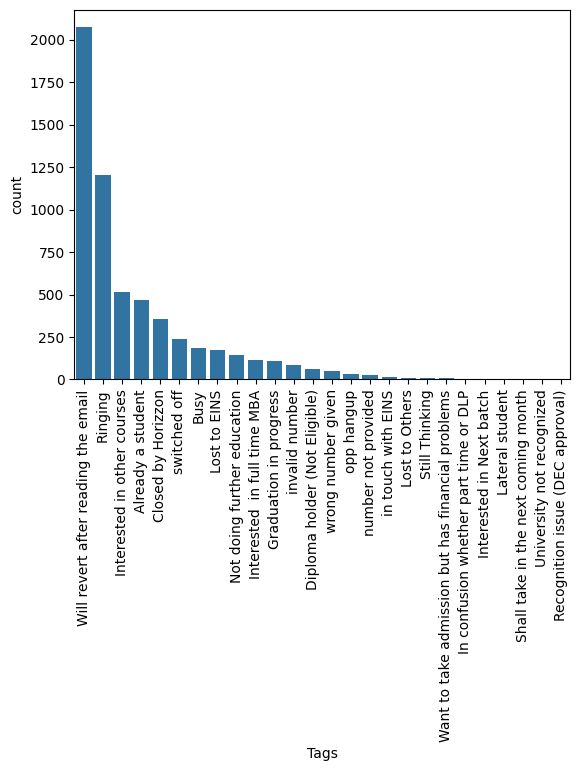

In [ ]:
#Plotting bar graph for the Tag column.
sns.barplot(leads['Tags'].value_counts())
plt.xticks(rotation=90)
plt.show()

**From the above graph, we have 'Will revert after reading the mail' with more value count, so it works as the mode for the Tags column.**

In [ ]:
#The null values are filled with mode of the Tags column since it is a categorical column.
leads['Tags'] = leads['Tags'].fillna(leads['Tags'].mode()[0])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


###### **Impute the values in the 'What is your current occupation' column**

In [ ]:
#Calculate the value counts of the 'What is your current occupation' column
leads['What is your current occupation'].value_counts()

,count
What is your current occupation,
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


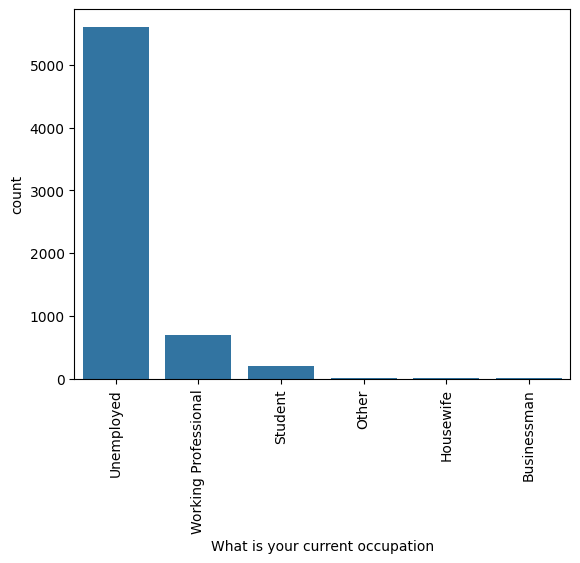

In [ ]:
#Plotting bargraph for the 'What is your current occupation' column
sns.barplot(leads['What is your current occupation'].value_counts())
plt.xticks(rotation=90)
plt.show()

**From the above graph, we have 'Unemployeed' with more value count, so it works as the mode for the What is your current occupation column.**

In [ ]:
#The null values are filled with mode of the 'What is your current occupation' column since it is a categorical column
leads['What is your current occupation'] = leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


###### **Impute the values in the Country column**

In [ ]:
#Calculate the value counts of the Country column
leads['Country'].value_counts()

,count
Country,
India,6492
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10
Hong Kong,7


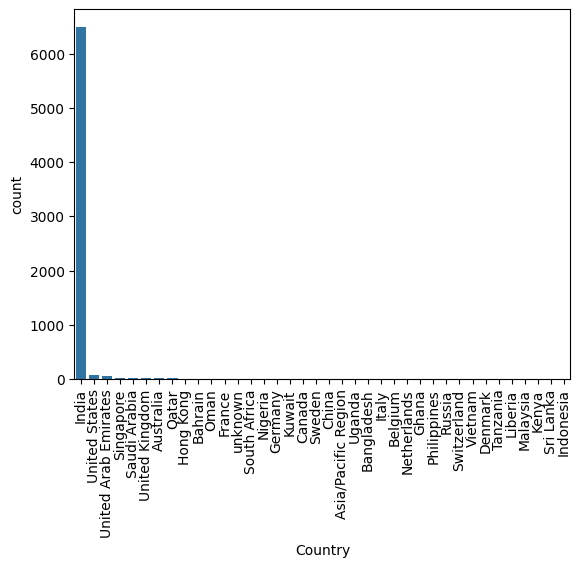

In [ ]:
# ploting bar graph for the 'country' column
sns.barplot(leads['Country'].value_counts())
plt.xticks(rotation=90)
plt.show()

**From the above graph, we have 'India' with more value count, so it works as the mode for the Country column.**

In [ ]:
#The null values are filled with mode of the 'Country' column since it is a categorical column
leads['Country'] = leads['Country'].fillna(leads['Country'].mode()[0])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


###### **Again check the null percentage of columns**

In [ ]:
#Checking the null values again
pd.DataFrame(check_null(leads))

,0
TotalVisits,1.0
Page Views Per Visit,1.0
Last Activity,1.0
Prospect ID,0.0
Search,0.0
A free copy of Mastering The Interview,0.0
City,0.0
Tags,0.0
Through Recommendations,0.0
Digital Advertisement,0.0


In [ ]:
#Since the 3 columns have only 1% of null values, as it very minute we can drop those rows completely
leads = leads.dropna(axis=0)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [ ]:
#The final list of null values percentage of leads data
pd.DataFrame(check_null(leads))

,0
Prospect ID,0.0
Lead Number,0.0
A free copy of Mastering The Interview,0.0
City,0.0
Tags,0.0
Through Recommendations,0.0
Digital Advertisement,0.0
Newspaper,0.0
X Education Forums,0.0
Newspaper Article,0.0


In [ ]:
#Checking the shape
leads.shape

(9074, 24)

In [ ]:
# we are droping "Lead Number" column since this is not required for our analysis.
leads = leads.drop(['Lead Number'],axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [ ]:
leads.shape

(9074, 23)

In [ ]:
#Retention of number of rows from data
print((len(leads.index)/9240)*100)

98.2034632034632


**We have retained 98% of the rows after cleaning the data.**

In [ ]:
#Reseting the index.
leads.reset_index(inplace=True)
leads.drop('index',axis=1,inplace=True)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


## **Step-4: Data Visualization**

In [ ]:
# Showing information about leads data frame
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Country                                 9074 non-null   obje

In [ ]:
# These are the catagorical columns from the leads dataframe
cat_columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','Search',
               'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','City',
               'A free copy of Mastering The Interview','Last Notable Activity']
# These are the numerical columns from the leads dataframe
num_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [ ]:
#Convert all the categorical columns(object) data type to category datatype.
for i in cat_columns:
  leads[i] = leads[i].astype('category')

#Convert all the numerical columns(int/float) data type to float datatype.
for i in num_columns:
  leads[i] = leads[i].astype('float')

In [ ]:
## showing information about leads data frame
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Prospect ID                             9074 non-null   object  
 1   Lead Origin                             9074 non-null   category
 2   Lead Source                             9074 non-null   category
 3   Do Not Email                            9074 non-null   category
 4   Do Not Call                             9074 non-null   category
 5   Converted                               9074 non-null   int64   
 6   TotalVisits                             9074 non-null   float64 
 7   Total Time Spent on Website             9074 non-null   float64 
 8   Page Views Per Visit                    9074 non-null   float64 
 9   Last Activity                           9074 non-null   category
 10  Country                                 9074 non

#### **Univariate Analysis**

**Categorical Variables** -- We can plot them using barplot

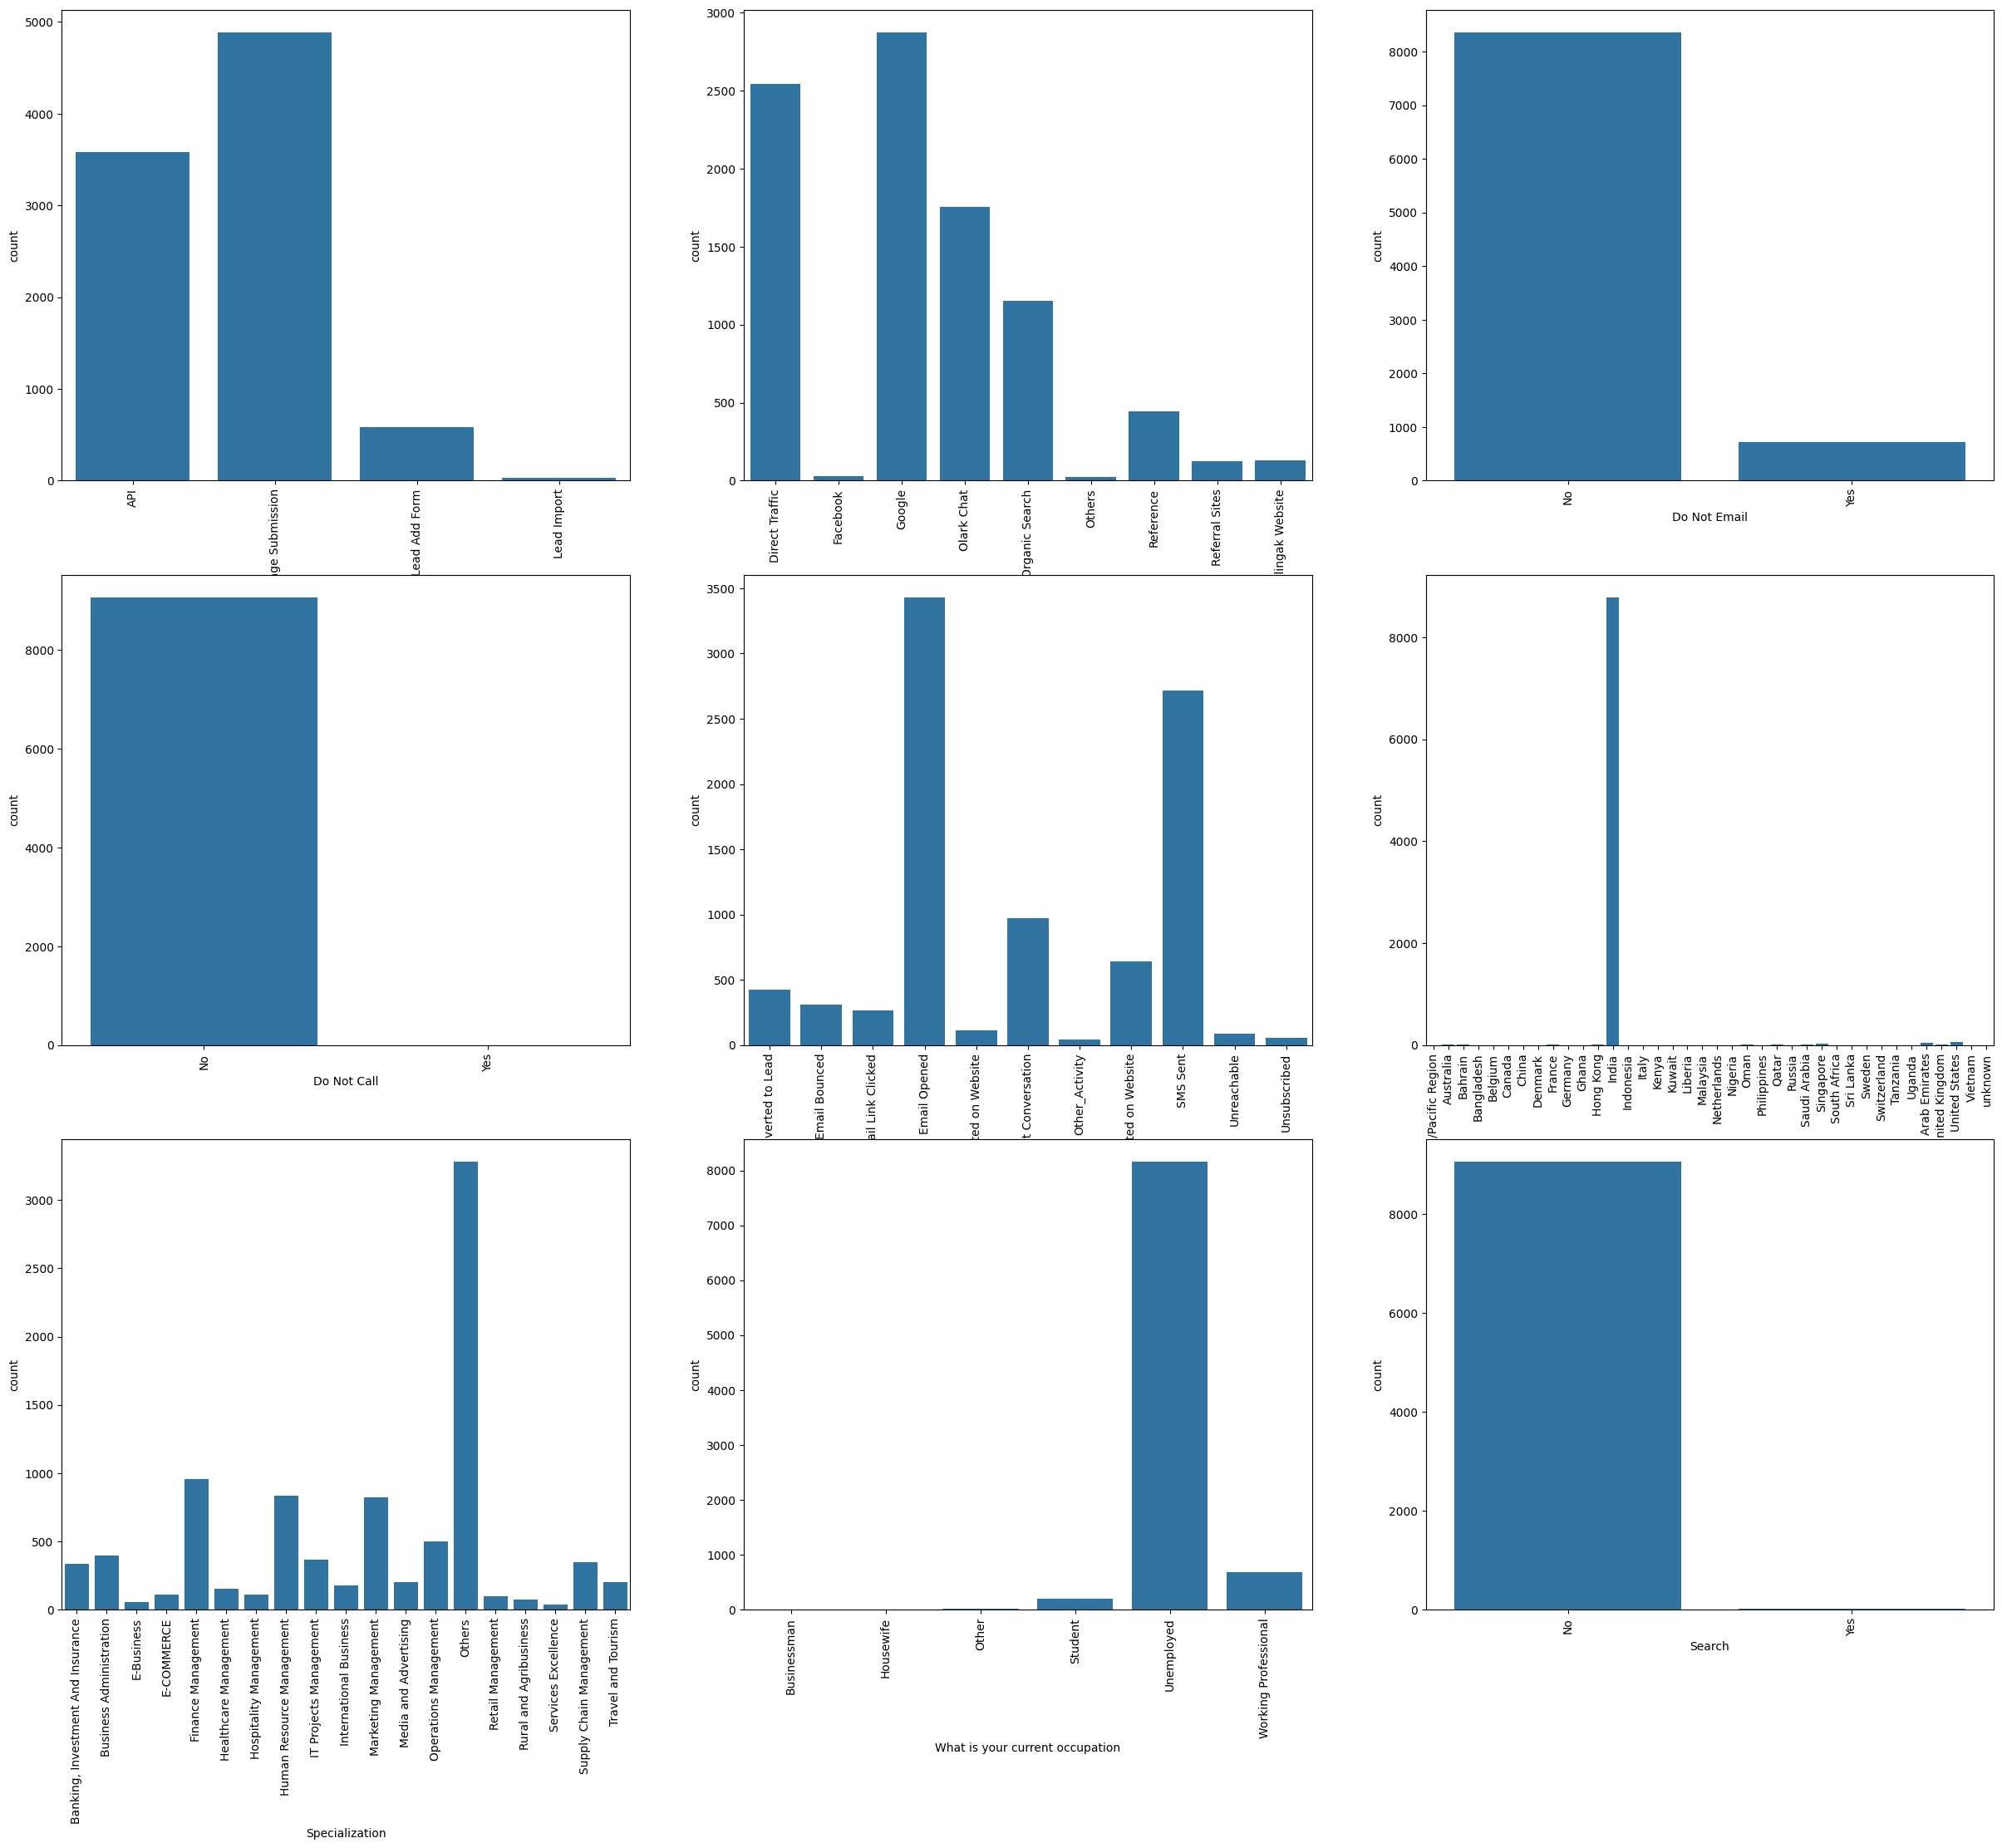

In [ ]:
#First 9 Categorical features are plotted here
plt.figure(figsize=(30,25))

plt.subplot(3,3,1)
sns.barplot(leads['Lead Origin'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.barplot(leads['Lead Source'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.barplot(leads['Do Not Email'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.barplot(leads['Do Not Call'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.barplot(leads['Last Activity'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.barplot(leads['Country'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.barplot(leads['Specialization'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.barplot(leads['What is your current occupation'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.barplot(leads['Search'].value_counts())
plt.xticks(rotation=90)

plt.show()

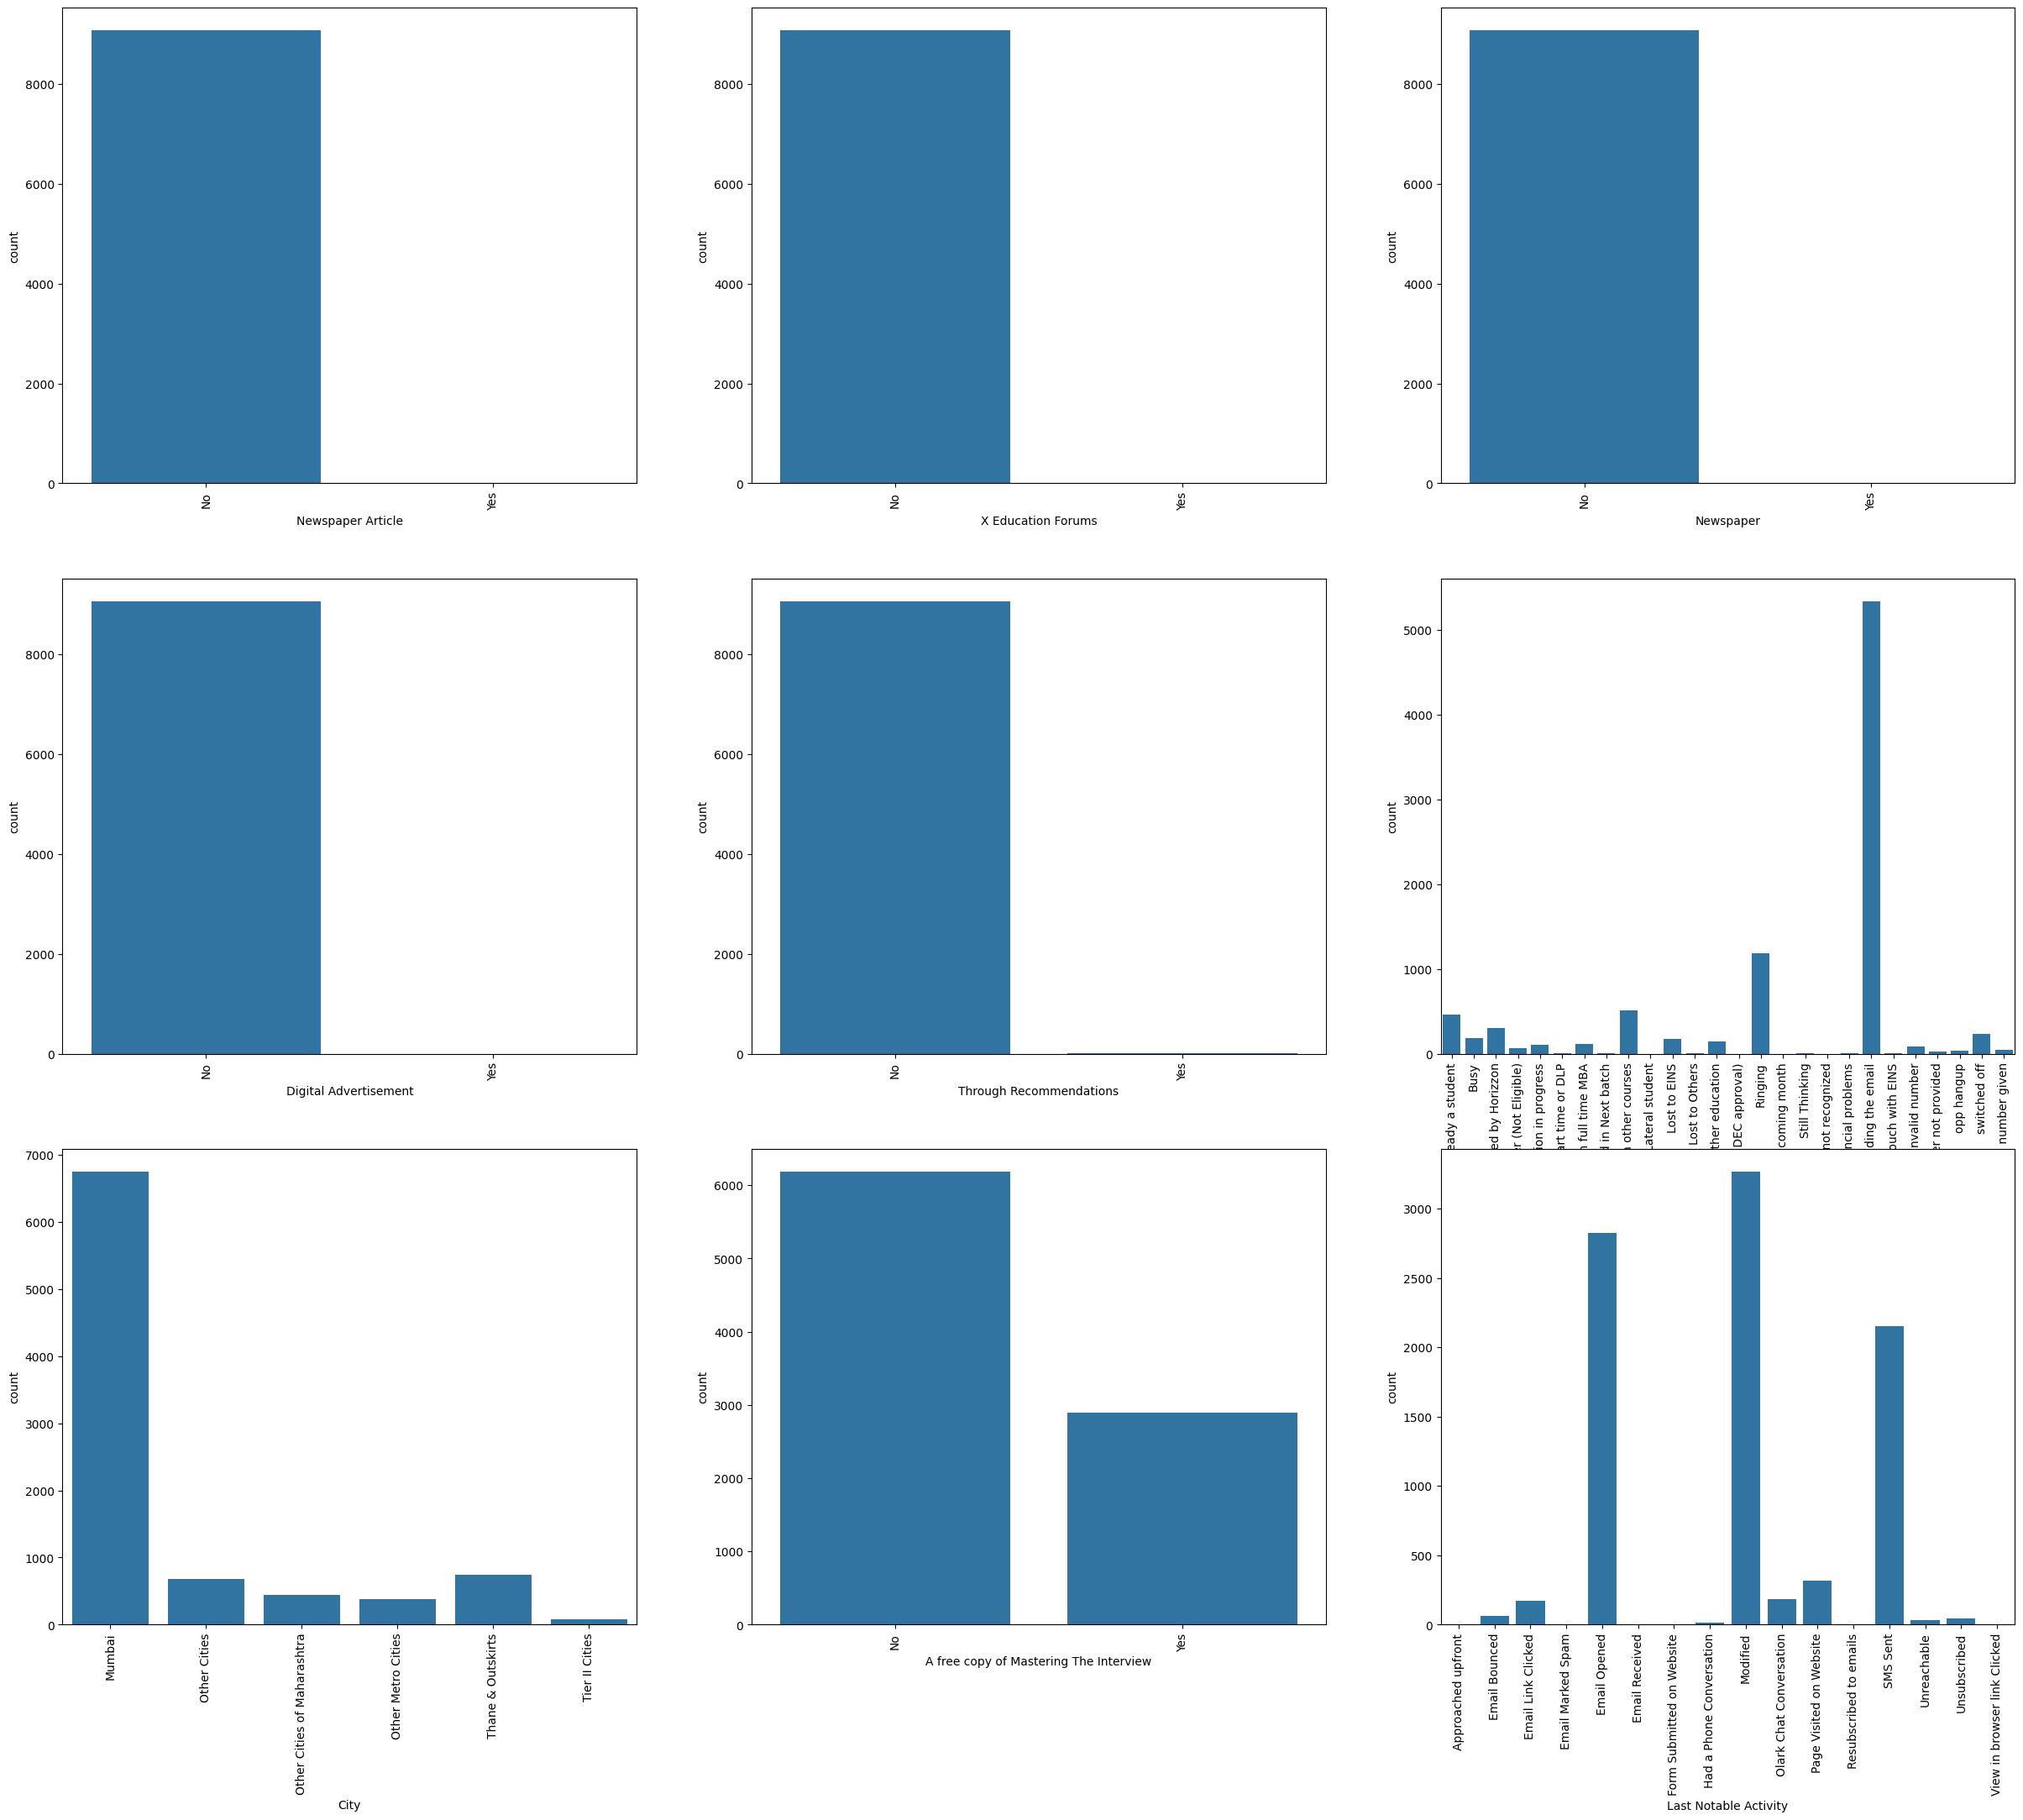

In [ ]:
#Next 9 Categorical features are plotted here
plt.figure(figsize=(30,25))

plt.subplot(3,3,1)
sns.barplot(leads['Newspaper Article'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.barplot(leads['X Education Forums'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.barplot(leads['Newspaper'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.barplot(leads['Digital Advertisement'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.barplot(leads['Through Recommendations'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.barplot(leads['Tags'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.barplot(leads['City'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.barplot(leads['A free copy of Mastering The Interview'].value_counts())
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.barplot(leads['Last Notable Activity'].value_counts())
plt.xticks(rotation=90)

plt.show()

**Numerical Variables** -- We can plot them using histplot

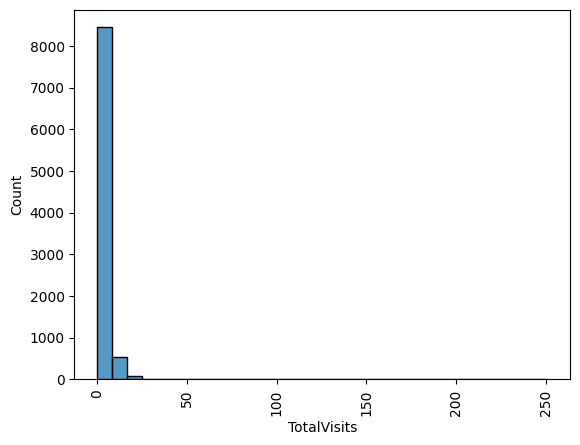

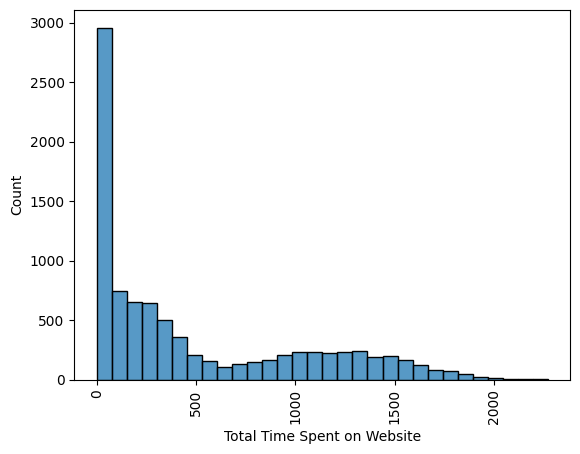

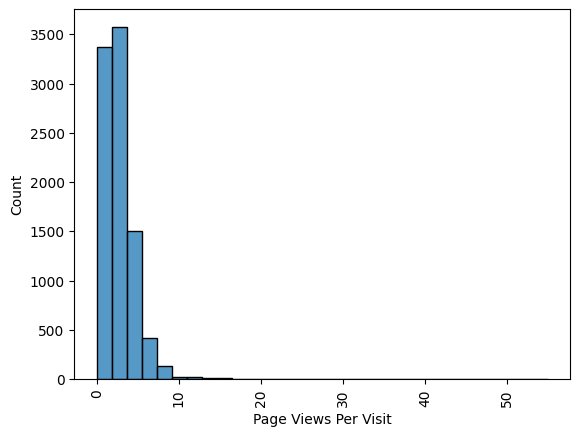

In [ ]:
for i in num_columns:
  sns.histplot(leads[i],bins=30)
  plt.xticks(rotation=90)
  plt.show()

#### **Bivariate Analysis**

**We can plot the categorical columns with Converted feature -- Target**

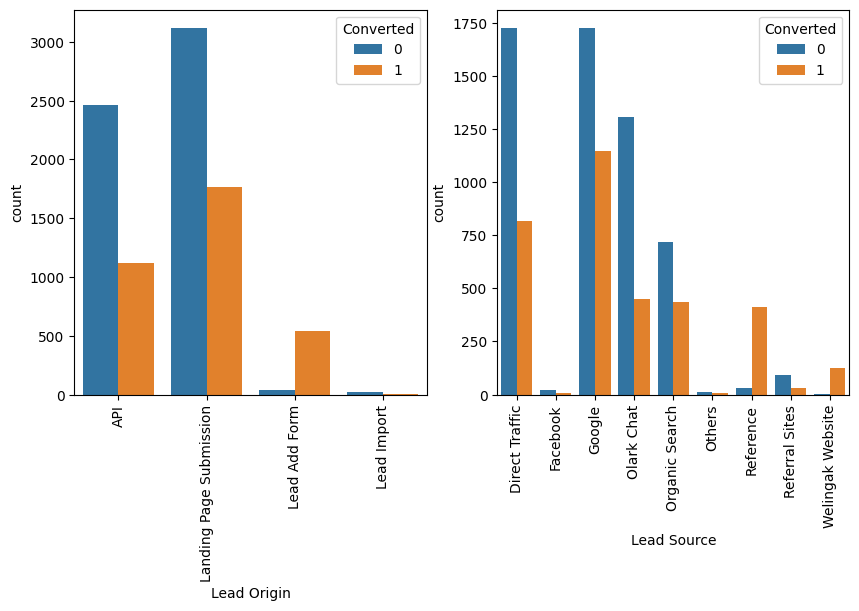

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **Lead Origin:** To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

- **Lead Source:** To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

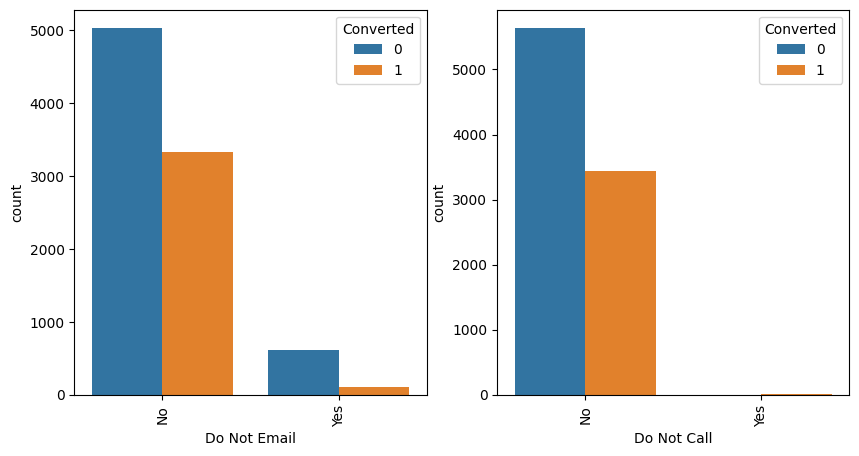

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **Do Not Email:** Most entries are 'No'. No Inference can be drawn with this parameter.

- **Do Not Call:** Most entries are 'No'. No Inference can be drawn with this parameter.

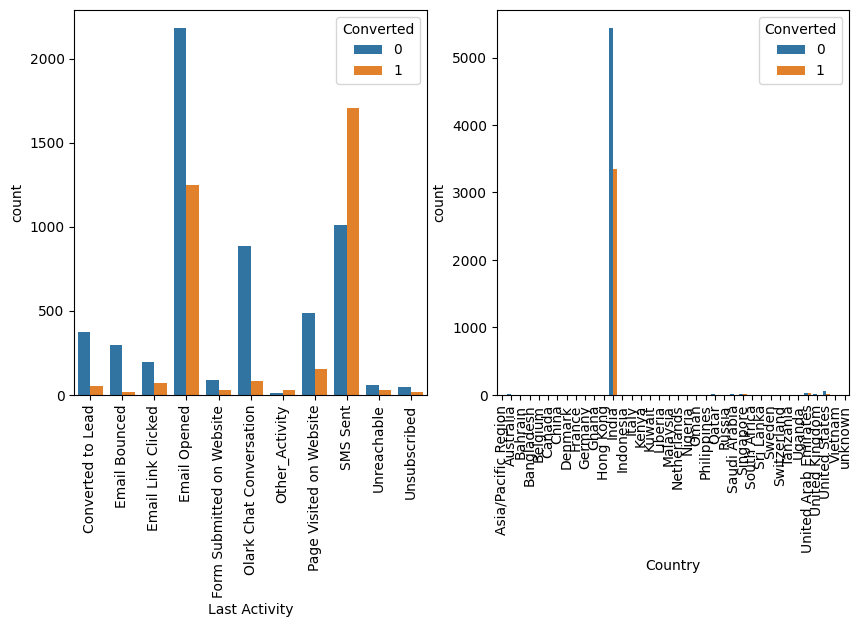

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'Country', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **Last Activity:** We need to focus more on Email Opened. For Conversion rate for leads with last activity as SMS Sent is high.

- **Country:** Most values are 'India' no such inference can be drawn.

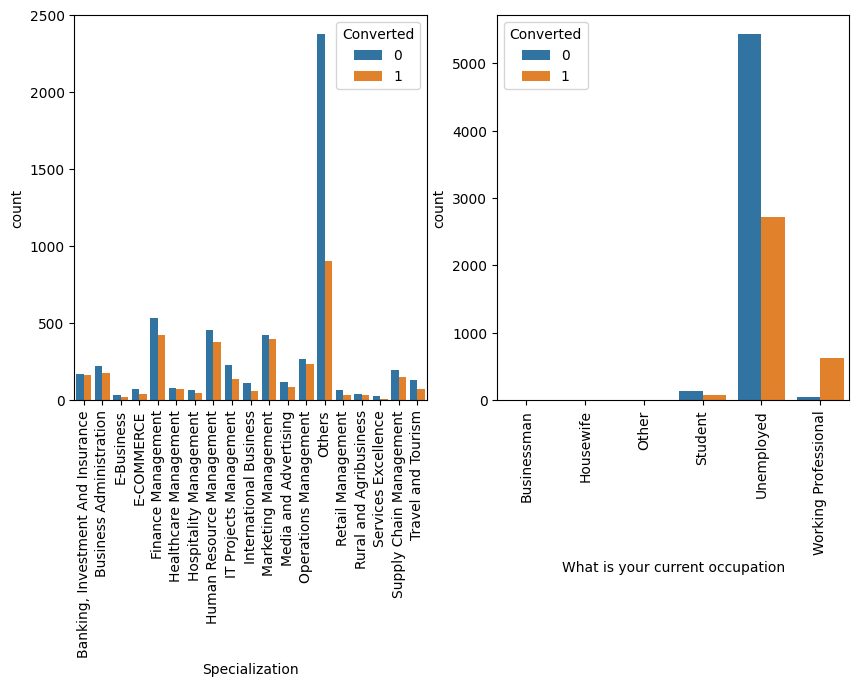

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **Specialization:** We need to focus more on Others Specialization for leads conversion rate.

- **What is your current occupation:** Unemployed leads are the most in numbers for conversion rate. Employeed leads are high in number converted.

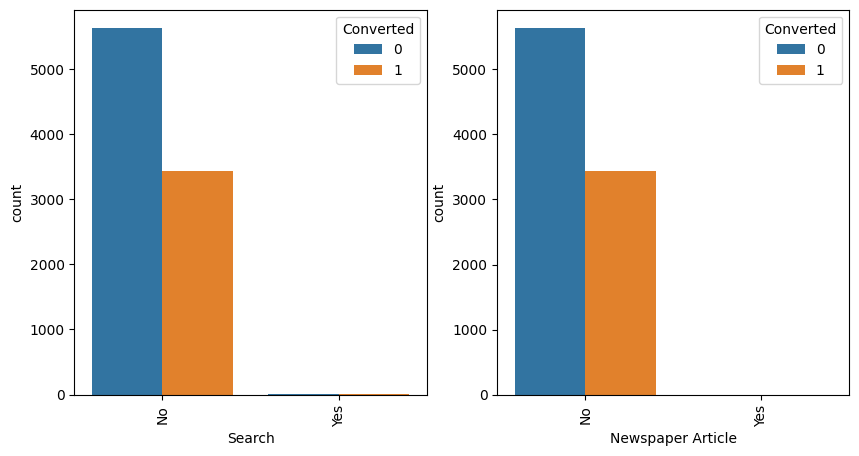

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'Search', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **Search:** Most entries are 'No'. No Inference can be drawn with this parameter.

- **Newspaper Article:** Most entries are 'No'. No Inference can be drawn with this parameter.

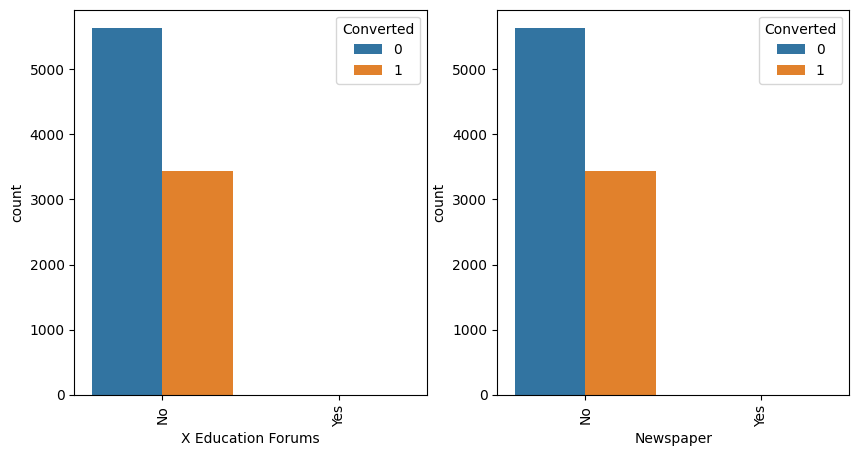

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'Newspaper', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **X Education Forums:** Most entries are 'No'. No Inference can be drawn with this parameter.

- **Newspaper:** Most entries are 'No'. No Inference can be drawn with this parameter.

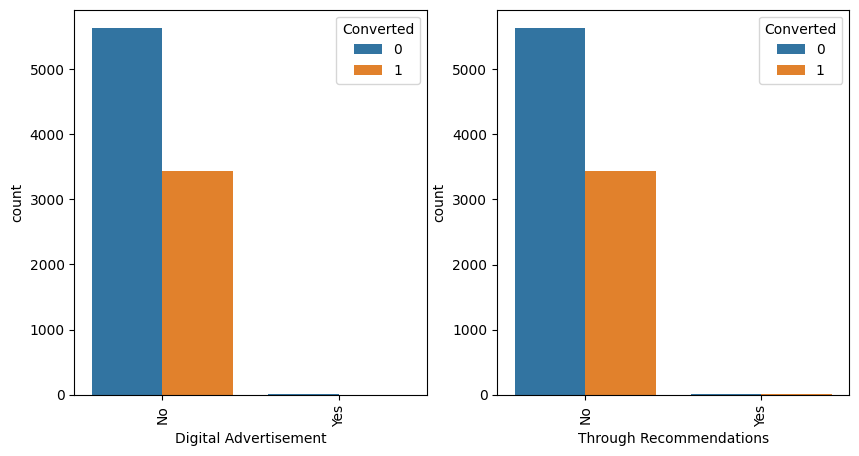

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **Digital Advertisement:** Most entries are 'No'. No Inference can be drawn with this parameter.

- **Through Recommendations:** Most entries are 'No'. No Inference can be drawn with this parameter.

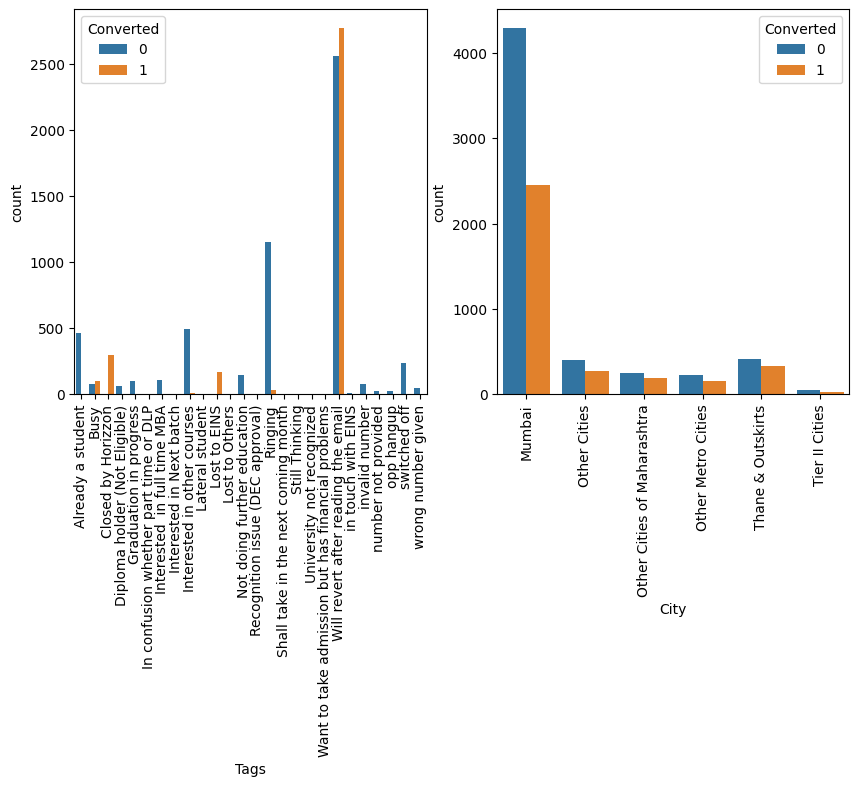

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'Tags', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'City', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **Tags:** Need to focus on other catgories.

- **City:** Most leads are from mumbai.

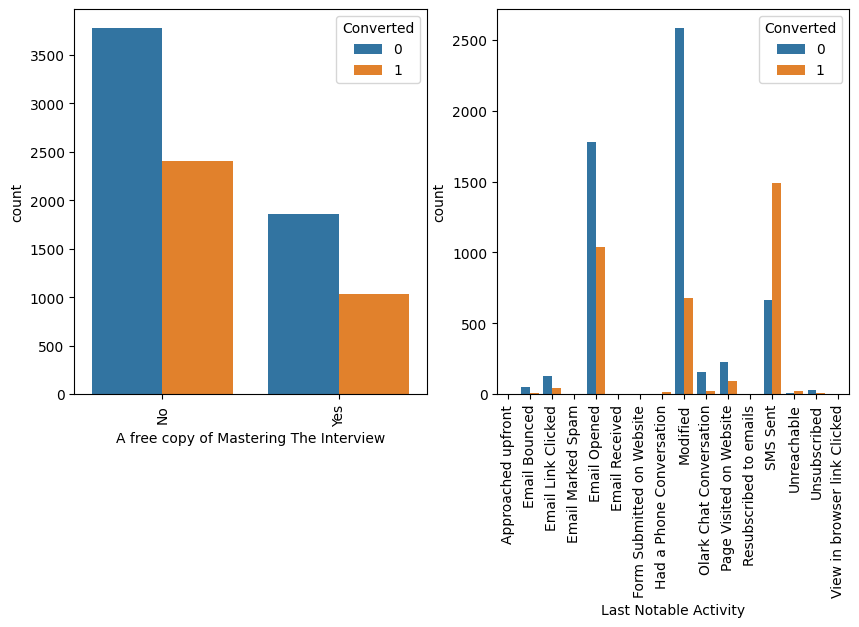

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #row col pos
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)  #row col pos
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leads)
plt.xticks(rotation=90)

plt.show()

Inference:

- **A free copy of Mastering The Interview:** Most entries are 'No'. No Inference can be drawn with this parameter.

- **Last Notable Activity:** We need to focus on Modified, Email Opened, SMS Sent.

In [ ]:
#From the bivariate analysis we can dropp these columns
leads = leads.drop(['Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations','Country','Tags'],axis = 1)

<Figure size 1500x1500 with 0 Axes>

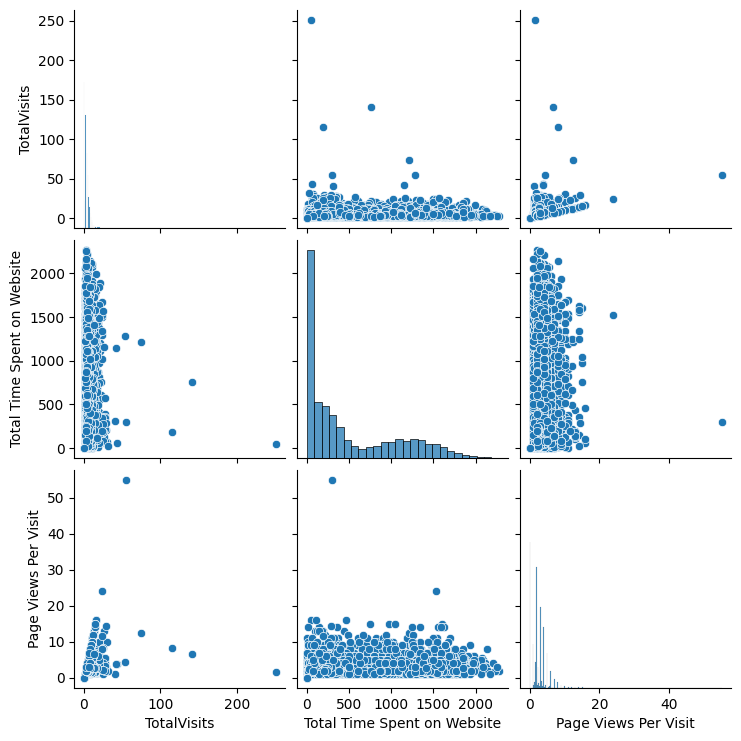

In [ ]:
#Pairplot is plotted against the numerical columns
plt.figure(figsize=(15,15))
sns.pairplot(leads[num_columns])
plt.show()

##### **Checking Outliers for the numerical columns**

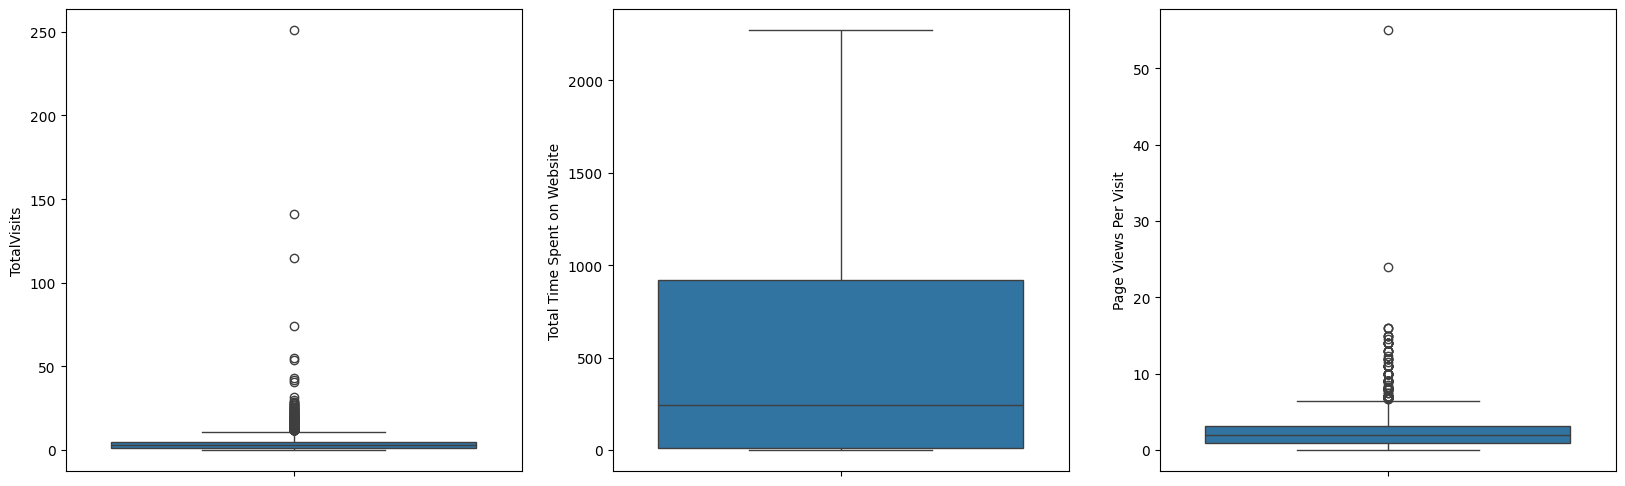

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)  #row col pos
sns.boxplot(y = 'TotalVisits', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,3,2)  #row col pos
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,3,3)  #row col pos
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads[num_columns].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


**By seeing the graphs and statistical information, we can say that there are some outliers in the data**

In [ ]:
# Removing the outliers
for col in num_columns:
  q1=leads[col].describe()["25%"]
  q3=leads[col].describe()["75%"]
  iqr=q3-q1 #interquartile range
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  leads[col]=np.where(leads[col]>upper_bound,upper_bound,leads[col])
  leads[col]=np.where(leads[col]<lower_bound,lower_bound,leads[col])

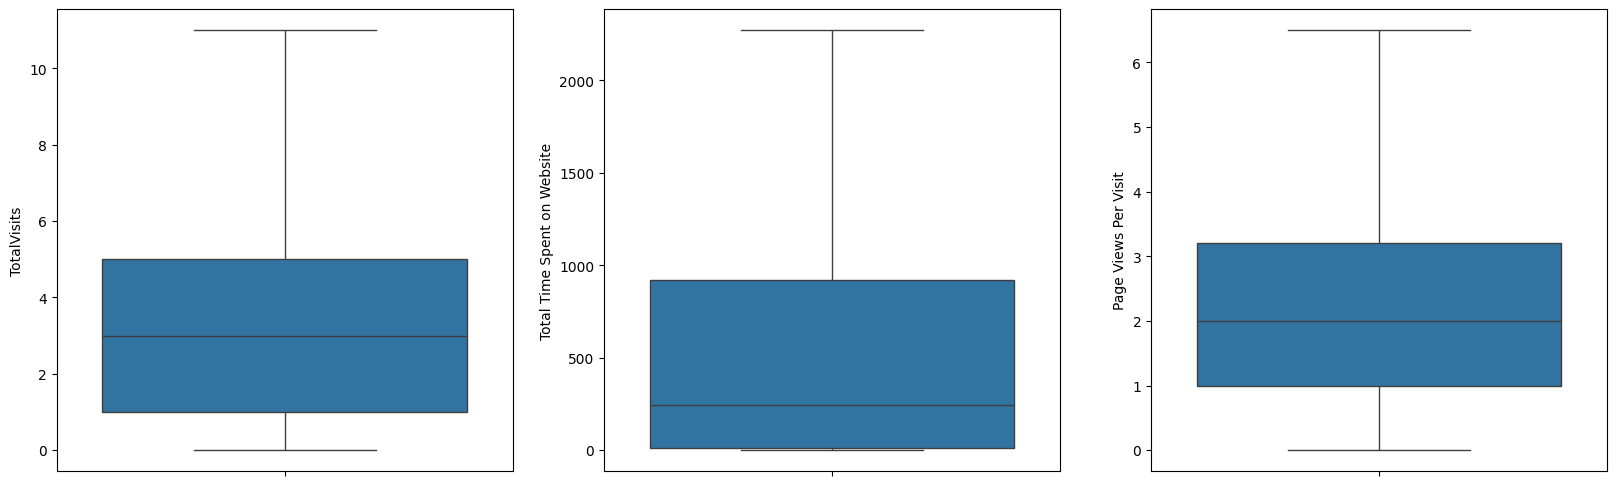

In [ ]:
# ploting once again after removing the outliers
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)  #row col pos
sns.boxplot(y = 'TotalVisits', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,3,2)  #row col pos
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.xticks(rotation=90)

plt.subplot(1,3,3)  #row col pos
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.xticks(rotation=90)

plt.show()

**Outliers are removed**

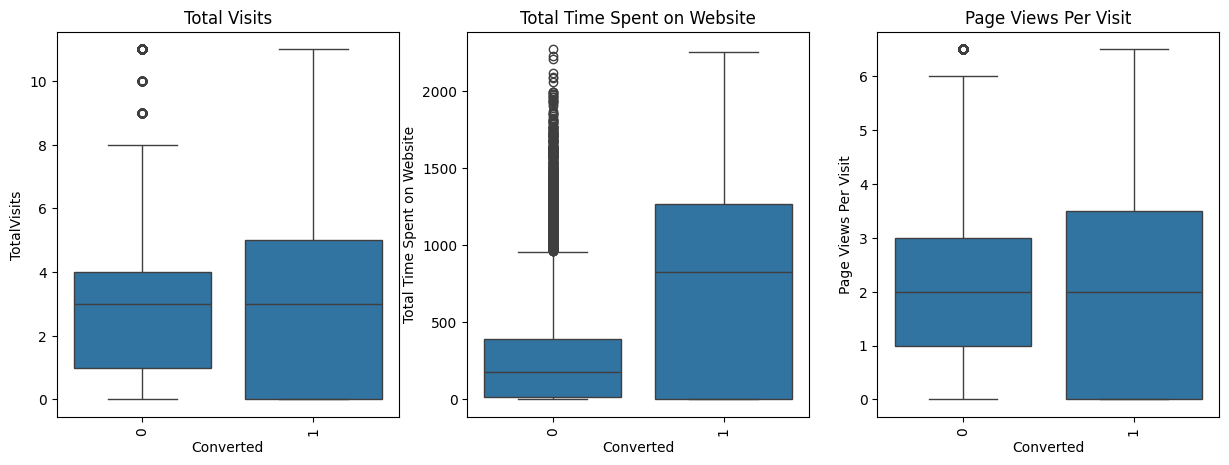

In [ ]:
# performing bivariate analysis

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)  #row col pos
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.title('Total Visits')
plt.xticks(rotation=90)

plt.subplot(1,3,2)  #row col pos
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.title('Total Time Spent on Website')
plt.xticks(rotation=90)

plt.subplot(1,3,3)  #row col pos
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.title('Page Views Per Visit')
plt.xticks(rotation=90)

plt.show()

**Inference:**

- **TotalVisits:** Median for converted and not converted leads are the same.
- **Total Time Spent on Website:** Leads spending more time on the weblise are more likely to be converted.
- **Page Views Per Visit:** Median for converted and unconverted leads is the same.

#### **Multi-variate Analysis**

**Heat map is plotted against numerical features**

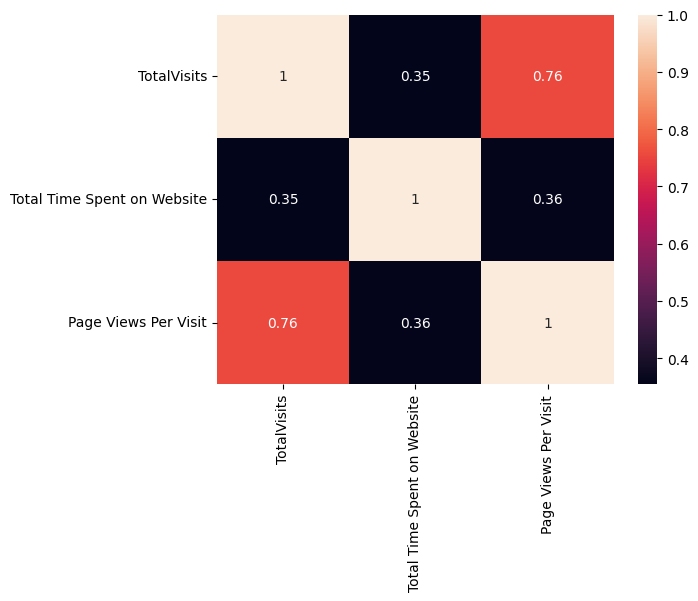

In [ ]:
#Heatmap is plotted
sns.heatmap(leads[num_columns].corr(),annot=True)
plt.show()

**TotalVisits and Pages Views Per Visit are highly correlated to each other rather than others.**

## **Step-5: Data Preparation**

In [ ]:
#Checking the heads of the dataframe
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Mumbai,No,Modified


In [ ]:
#Checking the shape
leads.shape

(9074, 15)

In [ ]:
#Checking the information of the dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Prospect ID                             9074 non-null   object  
 1   Lead Origin                             9074 non-null   category
 2   Lead Source                             9074 non-null   category
 3   Do Not Email                            9074 non-null   category
 4   Do Not Call                             9074 non-null   category
 5   Converted                               9074 non-null   int64   
 6   TotalVisits                             9074 non-null   float64 
 7   Total Time Spent on Website             9074 non-null   float64 
 8   Page Views Per Visit                    9074 non-null   float64 
 9   Last Activity                           9074 non-null   category
 10  Specialization                          9074 non

##### **Dummy variables creation**

In [ ]:
#Convert the Yes/No columns to 1/0
dummy1= ['Do Not Call','Do Not Email','A free copy of Mastering The Interview']

In [ ]:
#Converting the Yes/No columns to 1/0 using map function
leads[dummy1] = leads[dummy1].apply(lambda x: x.map({'No': 0, 'Yes': 1}))
leads[dummy1].head()

,Do Not Call,Do Not Email,A free copy of Mastering The Interview
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [ ]:
#Convert the following columns into numerical values by creating dummy variables
dummy2 = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City','Last Notable Activity']

In [ ]:
#Using get_dummies function we are creating dummies.
dummy = pd.get_dummies(leads[dummy2],drop_first = True, dtype = int)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Now concat the leads dataframe with dummy variables
leads = pd.concat([leads,dummy],axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Now drop the categorical columns from the main dataframe
leads = leads.drop(dummy2,axis=1)
leads.shape

(9074, 72)

In [ ]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Prospect ID                                           9074 non-null   object  
 1   Do Not Email                                          9074 non-null   category
 2   Do Not Call                                           9074 non-null   category
 3   Converted                                             9074 non-null   int64   
 4   TotalVisits                                           9074 non-null   float64 
 5   Total Time Spent on Website                           9074 non-null   float64 
 6   Page Views Per Visit                                  9074 non-null   float64 
 7   A free copy of Mastering The Interview                9074 non-null   category
 8   Lead Origin_Landing Page Submission             

##### **Train-Test Splitting**

In [ ]:
# splitting the data into train and test.
df_train, df_test = train_test_split(leads, test_size=0.3, random_state=42)

In [ ]:
#Get the train dataset
df_train.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1883,03ccc6c9-80b5-4e69-8317-0c45e7c3a30f,0,0,0,2.0,1419.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
438,d3e2638e-f1d6-4164-9e82-30301979b97e,0,0,0,2.0,56.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6415,f48d84fc-7481-40a6-b5e0-6c8f9c11faad,0,0,0,5.0,391.0,5.0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8673,28e21fc4-cc4e-435a-a842-eaa09815d9be,0,0,0,4.0,1645.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6399,73349410-2195-4d10-a872-c4a4dd839910,0,0,1,5.0,660.0,5.0,1,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Get the test dataset
df_test.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
447,b28952e5-503c-43f4-ac1f-cbf14f621a5b,0,0,0,6.0,351.0,6.00,1,1,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5313,2855e678-f5d1-4e87-baaa-1ff2095a713b,0,0,0,4.0,685.0,4.00,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3412,677ae829-f59b-451f-acbb-38abe825eafa,0,0,0,0.0,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4366,dd961913-d155-4d47-a964-211da62fd333,0,0,0,0.0,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5284,f151cb9c-2723-45cf-a1b2-e76801e29e71,0,0,0,4.0,164.0,1.33,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### **Re-scaling of columns**

In [ ]:
#Instatiate the Object
scaler = MinMaxScaler()

In [ ]:
#Re-scaling of training set columns
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1883,03ccc6c9-80b5-4e69-8317-0c45e7c3a30f,0,0,0,0.181818,0.629827,0.307692,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
438,d3e2638e-f1d6-4164-9e82-30301979b97e,0,0,0,0.181818,0.024856,0.307692,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6415,f48d84fc-7481-40a6-b5e0-6c8f9c11faad,0,0,0,0.454545,0.173546,0.769231,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8673,28e21fc4-cc4e-435a-a842-eaa09815d9be,0,0,0,0.363636,0.730138,0.615385,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6399,73349410-2195-4d10-a872-c4a4dd839910,0,0,1,0.454545,0.292943,0.769231,1,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## **Step-6: Model Building**

In [ ]:
#Creating Independent features set
X_train = df_train.drop(['Prospect ID','Converted'],axis = 1)

#Creating Dependent features set
y_train = df_train['Converted']

In [ ]:
#Create a logistic regression model
log_reg = LogisticRegression()

In [ ]:
#Using RFE function to eliminate unnecessary features
rfe = RFE(log_reg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Listing all the X_train columns with rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 37),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Others', False, 47),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website

In [ ]:
#Necessary columns to build a logistic regression model
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [ ]:
#These are the unecessary columns
remove_col = X_train.columns[~rfe.support_]
remove_col

Index(['Do Not Call', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Ad

##### **Model-1**

In [ ]:
# Building a logistic regression model.
X = X_train[col]
X_train_lm = sm.add_constant(X)
logm1 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.7
Date:                Sat, 17 Aug 2024   Deviance:                       5129.5
Time:                        17:23:34   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4020
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#Since this column is having p-value > 0.05, we can drop it
col = col.drop('What is your current occupation_Housewife',1)

##### **Model-2**

In [ ]:
# Rebuilding a logistic regression model.
X = X_train[col]
X_train_lm = sm.add_constant(X)
logm2 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.3
Date:                Sat, 17 Aug 2024   Deviance:                       5140.5
Time:                        17:23:34   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4010
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#Since this column is having p-value > 0.05, we can drop it
col = col.drop('Lead Origin_Lead Add Form',1)

##### **Model-3**

In [ ]:
# Rebuilding a logistic regression model.
X = X_train[col]
X_train_lm = sm.add_constant(X)
logm3 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.7
Date:                Sat, 17 Aug 2024   Deviance:                       5141.4
Time:                        17:23:34   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4009
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#Since this column is having p-value > 0.05, we can drop it
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

##### **Model-4**

In [ ]:
# Rebuilding a logistic regression model.
X = X_train[col]
X_train_lm = sm.add_constant(X)
logm4 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.8
Date:                Sat, 17 Aug 2024   Deviance:                       5143.6
Time:                        17:23:34   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4007
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Since all the p-values are correct, now check the VIF values.**

In [ ]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,What is your current occupation_Unemployed,13.12
1,Page Views Per Visit,7.57
2,Last Activity_SMS Sent,6.12
3,Lead Origin_Landing Page Submission,5.87
4,TotalVisits,5.38
5,Last Notable Activity_SMS Sent,5.01
6,Specialization_Others,3.75
7,Last Activity_Email Opened,2.44
8,Lead Source_Olark Chat,2.43
9,Total Time Spent on Website,2.31


In [ ]:
#We are dropping this column since VIF > 5.
col = col.drop('What is your current occupation_Unemployed',1)

##### **Model-5**

In [ ]:
# Rebuilding a logistic regression model.
X = X_train[col]
X_train_lm = sm.add_constant(X)
logm5 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.0
Date:                Sat, 17 Aug 2024   Deviance:                       5154.0
Time:                        17:23:35   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,Page Views Per Visit,7.26
1,Last Activity_SMS Sent,6.00
2,TotalVisits,5.27
3,Last Notable Activity_SMS Sent,5.01
4,Lead Origin_Landing Page Submission,3.88
5,Specialization_Others,2.43
6,Last Activity_Email Opened,2.28
7,Total Time Spent on Website,2.22
8,Lead Source_Olark Chat,1.94
9,Lead Source_Reference,1.26


In [ ]:
#We are dropping this column since VIF > 5.
col = col.drop('Page Views Per Visit',1)

##### **Model-6**

In [ ]:
#Rebuilding the logistic regression model
X = X_train[col]
X_train_lm = sm.add_constant(X)
logm6 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res6 = logm6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.8
Date:                Sat, 17 Aug 2024   Deviance:                       5175.6
Time:                        17:23:35   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,Last Activity_SMS Sent,5.93
1,Last Notable Activity_SMS Sent,5.01
2,Lead Origin_Landing Page Submission,3.38
3,TotalVisits,3.06
4,Specialization_Others,2.34
5,Total Time Spent on Website,2.21
6,Last Activity_Email Opened,2.20
7,Lead Source_Olark Chat,1.86
8,Lead Source_Reference,1.24
9,Do Not Email,1.22


In [ ]:
#We are dropping this column since VIF > 5.
col = col.drop('Last Activity_SMS Sent',1)

##### **Final model**

In [ ]:
#This is the final logistic regression model.
X = X_train[col]
X_train_lm = sm.add_constant(X)
logm7 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res7 = logm7.fit()
print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.1
Date:                Sat, 17 Aug 2024   Deviance:                       5222.2
Time:                        17:23:35   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,Lead Origin_Landing Page Submission,3.24
1,TotalVisits,3.04
2,Specialization_Others,2.30
3,Total Time Spent on Website,2.20
4,Last Activity_Email Opened,2.02
5,Lead Source_Olark Chat,1.85
6,Last Notable Activity_SMS Sent,1.71
7,Do Not Email,1.22
8,Lead Source_Reference,1.21
9,What is your current occupation_Working Profes...,1.20


**The final model is ready.**

##### **Predictions on training set**

In [ ]:
#Predicting the probabilities on the train set
y_train_pred = res7.predict(X_train_lm)
y_train_pred.head()

,0
1883,0.596514
438,0.043914
6415,0.496442
8673,0.896690
6399,0.961273


In [ ]:
#Reshaping the dataframe
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.59651428, 0.04391439, 0.49644228, ..., 0.01594845, 0.16833502,
       0.12905142])

In [ ]:
#Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.596514,1883
1,0,0.043914,438
2,0,0.496442,6415
3,0,0.896690,8673
4,1,0.961273,6399


In [ ]:
#Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = [1 if x > 0.5 else 0 for x in y_train_pred_final['Converted_Prob']]
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.596514,1883,1
1,0,0.043914,438,0
2,0,0.496442,6415,0
3,0,0.896690,8673,1
4,1,0.961273,6399,1


## **Step-7: Model Evaluation**

In [ ]:
# Let's check the overall accuracy for train set.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8085340891198236


**With the current cut off as 0.5 we have around 80.8% accuracy for train set.**

In [ ]:
#Confusion matrix for train set
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3578,  399],
       [ 817, 1557]])

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model -- TPR True Positive Rate
TP / float(TP+FN)

0.6558550968828981

In [ ]:
# Let us calculate specificity -- (1-FPR) False Positive Rate
TN / float(TN+FP)

0.8996731204425447

**With the current cut off as 0.5 we have sensitivity of around 65.5% and specificity of around 89.9%.**

In [ ]:
# Precision
print(TP / float(TP + FP))

In [ ]:
# Recall
print(TP / float(TP + FN))

**With the current cut off as 0.5 we have sensitivity of around 65.5% and specificity of around 89.9%.**

## **Step-8: Understanding ROC Curve**

In [ ]:
#Function to draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [ ]:
tpr_fpr = pd.DataFrame({'TPR':tpr, 'FPR':fpr, 'Thresholds':thresholds})
tpr_fpr.head()

,TPR,FPR,Thresholds
0,0.000000,0.0,inf
1,0.000421,0.0,0.999721
2,0.000842,0.0,0.999709
3,0.001264,0.0,0.999498
4,0.001685,0.0,0.999455


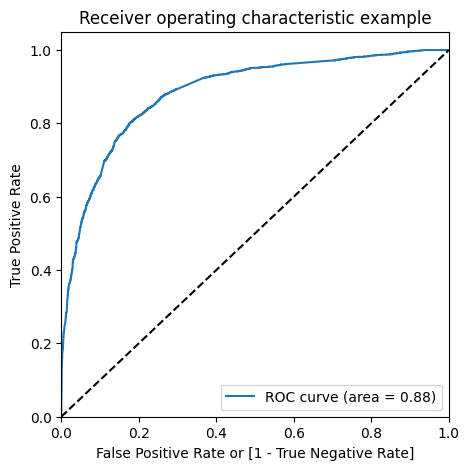

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Since the area of ROC curve is 0.88 which is nearer to 1 (A very good value)**

## **Step-9 : Finding optimal cutoff**

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.596514,1883,1,1,1,1,1,1,1,0,0,0,0
1,0,0.043914,438,0,1,0,0,0,0,0,0,0,0,0
2,0,0.496442,6415,0,1,1,1,1,1,0,0,0,0,0
3,0,0.896690,8673,1,1,1,1,1,1,1,1,1,1,0
4,1,0.961273,6399,1,1,1,1,1,1,1,1,1,1,1


#### **Accuracy**

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373799  1.000000  0.000000
0.1   0.1  0.551094  0.971356  0.300226
0.2   0.2  0.780350  0.885847  0.717375
0.3   0.3  0.800346  0.836984  0.778476
0.4   0.4  0.815462  0.772115  0.841338
0.5   0.5  0.808534  0.655855  0.899673
0.6   0.6  0.802078  0.586352  0.930852
0.7   0.7  0.788065  0.514743  0.951220
0.8   0.8  0.766336  0.425021  0.970078
0.9   0.9  0.721934  0.275906  0.988182


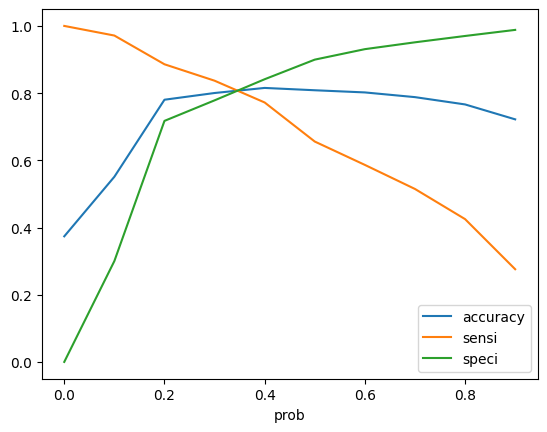

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The point of intersection of accuracy, sensitivity and specivicity gives the optimal cutoff.

**The optimal cutoff is 0.35**

In [ ]:
# predicting the values.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.596514,1883,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.043914,438,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.496442,6415,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.896690,8673,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.961273,6399,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Let's check the overall accuracy for train set.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8119981105337742

**With the current cut off as 0.35 we have around 81.1% accuracy for train set**

In [ ]:
#confusion_matrix for train set
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3237,  740],
       [ 454, 1920]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8087615838247684

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8139300980638673

**With the current cut off as 0.35 we have around 80.8 sensitivity and 81.3% specificity for train set.**

#### **Precision and Recall**

In [ ]:
# Precision
print(TP / float(TP+FP))

0.7218045112781954


In [ ]:
# Recall
print(TP / float(TP+FN))

0.8087615838247684


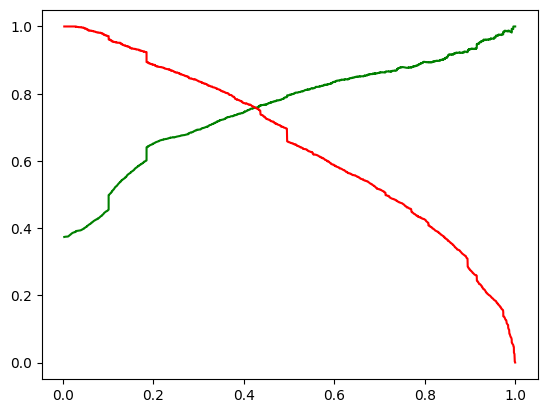

In [ ]:
#Find optimum value for Recall - precision
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The optimum cutoff is 0.41**

In [ ]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_1
0,0,0.596514,1883,1,1,1,1,1,1,1,0,0,0,0,1,1
1,0,0.043914,438,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.496442,6415,0,1,1,1,1,1,0,0,0,0,0,1,1
3,0,0.896690,8673,1,1,1,1,1,1,1,1,1,1,0,1,1
4,1,0.961273,6399,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_1)

0.8184537868052275

**With the current cut off as 0.41 we have around 81.1% accuracy.**

In [ ]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_1)
confusion2

array([[3375,  602],
       [ 551, 1823]])

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7517525773195877

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7679022746419545

**With the current cut off as 0.41 we have around 75.1% Precision and 76.7 Recall for train set.**

## **Step-10: Predictions on Test set**

In [ ]:
#Creating Independent features set
X_test = df_test.drop(['Prospect ID','Converted'],axis = 1)

#Creating Dependent features set
y_test = df_test['Converted']

In [ ]:
#Displaying X_test
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
447,0,0,6.0,351.0,6.00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5313,0,0,4.0,685.0,4.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3412,0,0,0.0,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4366,0,0,0.0,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5284,0,0,4.0,164.0,1.33,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Displaying y_test
y_test.head()

,Converted
447,0
5313,0
3412,0
4366,0
5284,0


In [ ]:
#Re-scaling the test dataset numerical columns
X_test[num_columns] = scaler.transform(X_test[num_columns])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
447,0,0,0.545455,0.155792,0.923077,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5313,0,0,0.363636,0.304039,0.615385,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3412,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4366,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5284,0,0,0.363636,0.072792,0.204615,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Adding a constant for Test dataset
X = X_test[col]
X_test_lm = sm.add_constant(X)
X_test_lm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
447,1.0,0,0.545455,0.155792,1,0,0,0,1,0,0,0,0,0,0
5313,1.0,0,0.363636,0.304039,1,0,0,0,0,0,0,0,0,0,0
3412,1.0,0,0.000000,0.000000,0,1,0,0,1,0,1,0,0,0,0
4366,1.0,0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0
5284,1.0,0,0.363636,0.072792,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,1.0,0,0.181818,0.318242,0,0,0,0,1,0,1,0,0,0,0
1563,1.0,0,0.000000,0.000000,0,1,0,0,1,0,1,0,0,0,0
7520,1.0,0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0
7133,1.0,0,0.000000,0.000000,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
#Predicting the values for test dataset
y_test_pred = res7.predict(X_test_lm)
y_test_pred.head()

,0
447,0.183492
5313,0.160840
3412,0.185190
4366,0.101422
5284,0.582073


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
447,0
5313,0
3412,0
4366,0
5284,0


In [ ]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,447,0.183492
1,0,5313,0.160840
2,0,3412,0.185190
3,0,4366,0.101422
4,0,5284,0.582073


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,447,0.183492
1,0,5313,0.160840
2,0,3412,0.185190
3,0,4366,0.101422
4,0,5284,0.582073


#### **Accuracy**

In [ ]:
# predicting the values.
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,447,0.183492,0
1,0,5313,0.160840,0
2,0,3412,0.185190,0
3,0,4366,0.101422,0
4,0,5284,0.582073,1


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8049944913698127

**With the current cut off as 0.35 we have around 80.4% accuracy for test dataset which is almost equal with trained dataset.**

In [ ]:
#confusion_matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1342,  320],
       [ 211,  850]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8011310084825636

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8074608904933814

**With the current cut off as 0.35 we have around 80.1% sensitivity and 80.7% specificity for test dataset which is almost equal with trained dataset.**

#### **Precision and Recall**

In [ ]:
# predicting the values.
y_pred_final['final_predicted_1'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted,final_predicted_1
0,0,447,0.183492,0,0
1,0,5313,0.160840,0,0
2,0,3412,0.185190,0,0
3,0,4366,0.101422,0,0
4,0,5284,0.582073,1,1


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted_1)

0.8116048475945649

**With the current cut off as 0.41 we have 81.1% Accuracy for test set**

In [ ]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted_1)
confusion2

array([[1398,  264],
       [ 249,  812]])

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7546468401486989

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.765315739868049

**With the current cut off as 0.41 we have Precision around 75% and Recall around 76% for test dataset which is almost equal to trained dataset**

## **Conclusion**

**Metrics for test dataset for against Accuracy:**
- With the current cut off as 0.35 we have around 80.4% accuracy.
- With the current cut off as 0.35 we have sensitivity of around 80.1%.
- With the current cut off as 0.35 we have specificity of around 80.7%.


**These values are equal to trained dataset values with cutoff 0.35**

**Metrics for test dataset against Precision_recall:**
- With the current cut off as 0.41 we have around 81.1% accuracy.
- With the current cut off as 0.41 we have Precision of around 75.4%.
- With the current cut off as 0.41 we have Recall of around 76.4%.


**These values are equal to trained dataset values with cutoff 0.41**

**So we can say that this logistic regression model is good to go.**

**The most significant factors influencing the likelihood of a lead converting are:**
1.	Total Time Spent on Website
2.	Total Number of Visits
3.	Lead Source:
	Google, Direct Traffic, Organic Search
4.	Last Activity:
	SMS sent
5.	Lead Origin:
	API, Lead Ad Format
6.	Current Occupation:
	Working Professional

By focusing on these factors, X Education can significantly enhance its ability to convert potential leads into paying customers, thereby increasing overall course enrolment.
